<a href="https://colab.research.google.com/github/markiroberts/gogglecolab01/blob/main/02Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib as plt

# Check PyTorch Version
torch.__version__

'2.1.0+cu121'

In [2]:
def plot_predictions(xtrain, ytrain, xtest, ytest, predictions=None):

  plt.pyplot.figure(figsize=(10,7))
  plt.pyplot.scatter(xtrain, ytrain,  c="b", s=4,   marker=".", label="Training data")
  plt.pyplot.scatter(xtest,  ytest,   c="g", s=4,  marker=".", label="Testing data")
  if predictions is not None:
    titletext = f"Element counts Training: {len(xtrain)}, Test: {len(xtest)}, Predictions:{len(predictions)}"
    plt.pyplot.scatter(xtest, predictions,   c="r", s=4,  marker=".", label="Predictions")
  else:
    titletext = f"Element counts Training: {len(xtrain)}, Test: {len(xtest)}, Predictions: None"

  plt.pyplot.legend(prop={"size": 14})
  plt.pyplot.title(titletext)

In [3]:
def plot_loss(epochlist, train_losslist, test_losslist):

  plt.pyplot.figure(figsize=(10,7))
  plt.pyplot.scatter(epochlist, train_losslist,  c="b", s=4,   marker=".", label="Training")
  plt.pyplot.scatter(epochlist, test_losslist,   c="r", s=4,   marker=".", label="Test")
  titletext = f"Loss vs. Epoch"

  plt.pyplot.legend(prop={"size": 14})
  plt.pyplot.title(titletext)

In [4]:
def show_model(themodel):
  for x in themodel.state_dict().items():
    for y in x:
      print (y, sep=" ", end="")
      print("\t", end="")
    print (" ")


##Create device-agnostic code

This means if we've got access to a GPU, our code will use

In [5]:
# Setup device agnostic code.
device = "cuda" if torch.cuda.is_available() else "cpu"
print (f"Device: {device}")

Device: cuda


<Figure size 640x480 with 0 Axes>

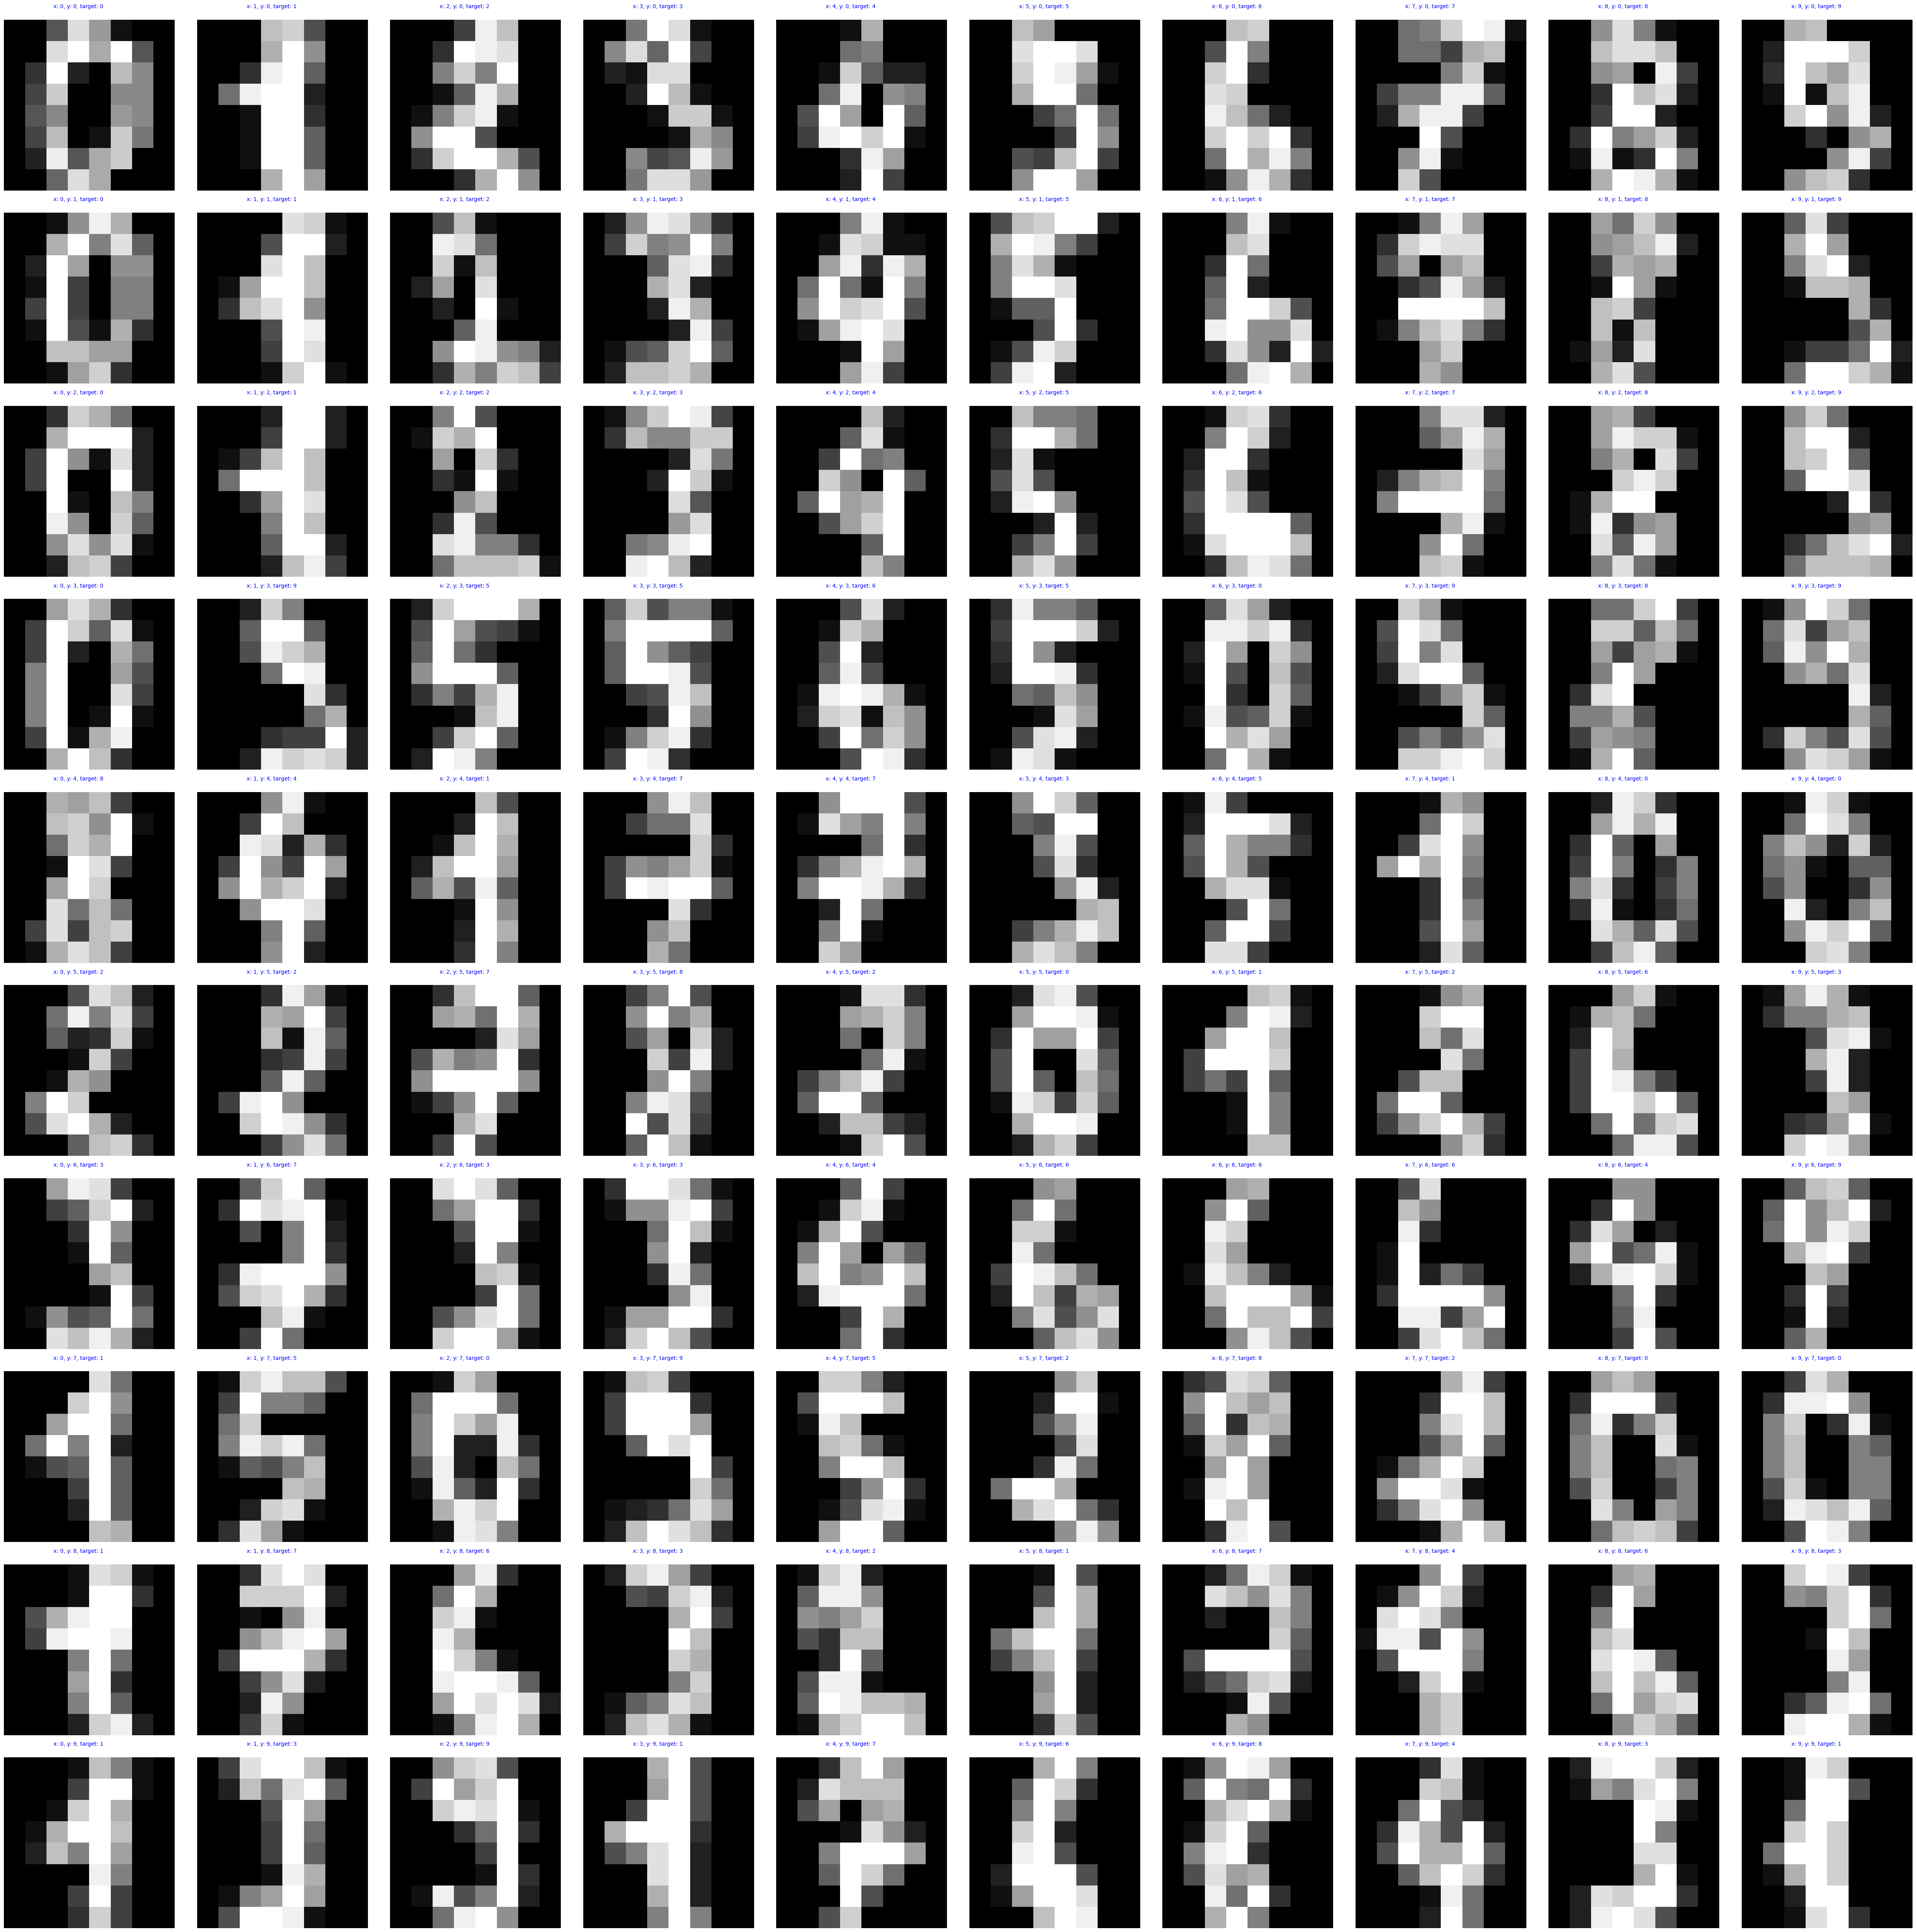

<function Bunch.items>

In [48]:
from sklearn.datasets import load_digits

digits = load_digits()
import matplotlib.pyplot as plt
plt.close('all')
plt.gray()
plt.tight_layout(pad=None, h_pad=None, w_pad=None, rect=None)
label_right = 3.0
label_top = -1.0

max_width = 10
max_height = 10
max_count = max_width * max_height

fig, axs = plt.subplots(max_height,max_width,figsize=(5 * max_width, 5 * max_height))
fig.tight_layout()

for digit in range(max_count):
  x = digit % max_width
  y = int(digit / max_width)
  axs[y,x].matshow(digits.images[digit])
  title_string = f"x: {x}, y: {y}, target: {digits.target[digit]}"
  axs[y,x].text(
        label_right, label_top,
        title_string,
        c="blue",
        horizontalalignment='center',
        verticalalignment='bottom')

  axs[y,x].set_xlabel(None)
  axs[y,x].set_ylabel(None)
  axs[y,x].set_axis_off()

plt.show()
digits.items


In [8]:
for x in digits:
  print(x, "\t", end="")
  match x:
    case 'data':
      print (digits.data[:5])
    case 'target':
      print (digits.target[:5])
    case 'frame':
      print (digits.frame)
    case 'feature_names':
      print (digits.feature_names[:5])
    case 'target_names':
      print (digits.target_names[:5])
    case 'images':
      for image in digits.images[:5]:
        print('image: ', image)
    case 'DESCR':
      print (digits.DESCR )
    case _:
      print('other', x)


data 	[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  

In [114]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib as plt
from sklearn.datasets import load_digits

# Check PyTorch Version
torch.__version__

# Setup device agnostic code.
device = "cuda" if torch.cuda.is_available() else "cpu"
print (f"Device: {device}")

# Get training data
digits = load_digits()

targets = torch.zeros([len(digits.target),10], dtype=torch.float32)

for y in range(len(digits.target)):
  for x in range(10):
    if y == digits.target[x]:
      targets[y,x] = 1
    else:
      targets[y,x] = 0

# Create training set
train_split = int(0.8 * len(digits.data))
X_train, y_train = digits.data[:train_split], targets[:train_split]
X_test, y_test   = digits.data[train_split:], targets[train_split:]

X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)

#print (X_train[0], y_train[0])
print(f"X_train[0].size: {X_train[0].size} \tX_train length {len(X_train)}")
print(f"y_train[0].size: {y_train[0].size} \ty_train length {len(y_train)}")
print(f"X_test[0].size: {X_test[0].size} \tX_train length {len(X_test)}")
print(f"y_test[0].size: {y_test[0].size} \ty_train length {len(y_test)}")

class identifyDigit(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 64, out_features= 4)
        self.layer_2 = nn.Linear(in_features = 4,  out_features= 10)

    def forward(self, x):
      return(self.layer_2(self.layer_1(x)))
#        out = self.linear(x)
#        weight = self.state_dict().get("linear.weight")
#        bias   = self.state_dict().get("linear.bias")
#        print(f"Linear weight: {weight}")
#        out = x * weight + bias
#        return out



Device: cuda
X_train[0].size: <built-in method size of Tensor object at 0x787647ec27a0> 	X_train length 1437
y_train[0].size: <built-in method size of Tensor object at 0x787647ec27a0> 	y_train length 1437
X_test[0].size: <built-in method size of Tensor object at 0x787647ec27a0> 	X_train length 360
y_test[0].size: <built-in method size of Tensor object at 0x787647ec27a0> 	y_train length 360


<ipython-input-114-3b3ad017b704>:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
<ipython-input-114-3b3ad017b704>:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.float32).to(device)


Epoch: 0, Loss: 14.84605884552002, Loss Test: 717.3980712890625
Epoch: 100, Loss: nan, Loss Test: nan
Epoch: 200, Loss: nan, Loss Test: nan
Epoch: 300, Loss: nan, Loss Test: nan
Epoch: 400, Loss: nan, Loss Test: nan
Epoch: 500, Loss: nan, Loss Test: nan
Epoch: 600, Loss: nan, Loss Test: nan
Epoch: 700, Loss: nan, Loss Test: nan
Epoch: 800, Loss: nan, Loss Test: nan
Epoch: 900, Loss: nan, Loss Test: nan


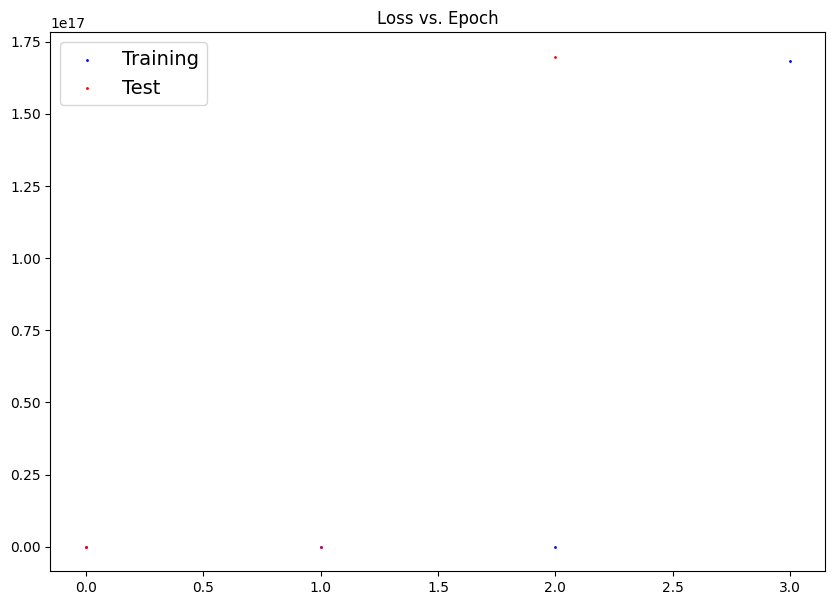

In [121]:
inputDim = 64       # takes 64 pixel input
outputDim = 10      # identifies digit 0 - 9
learningRate = 0.01
epochs = 1000
identifyDigit_model02 = identifyDigit().to(device)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(identifyDigit_model02.parameters(), lr=learningRate)

loss_list = []
test_loss_list = []
epoch_list = []

for epoch in range(epochs):
  optimizer.zero_grad()
# get output from the model, given the inputs
  outputs = identifyDigit_model02(X_train)

  # get loss for the predicted output
  loss = criterion(outputs, y_train)

  # get gradients w.r.t to parameters
  loss.backward()

  # update parameters
  optimizer.step()

  # test model
  with torch.no_grad():
    outputs_test = identifyDigit_model02(X_test)
    # get loss for the predicted output
    loss_test = criterion(outputs_test, y_test)

    epoch_list.append(epoch)
    loss_list.append(loss.item())
    test_loss_list.append(loss_test.item())

    if (epoch % int(epochs/10) == 0):
      print (f"Epoch: {epoch}, Loss: {loss.item()}, Loss Test: {loss_test.item()}")

plot_loss(epoch_list, loss_list, test_loss_list)

In [123]:
loss_list[:4]

[14.84605884552002, 708.4402465820312, 2458340.5, 1.6846466334693786e+17]